In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
img_size = (227, 227) 
batch_size = 32 
extract_path="/kaggle/input/animals10/raw-img" 
datagen = ImageDataGenerator( 
 rescale=1.0/255, # Нормалізація 
 validation_split=0.2 # 20% даних під валідацію 
) 
train_generator = datagen.flow_from_directory( 
 extract_path, 
 target_size=img_size, 
 batch_size=batch_size, 
 class_mode='categorical', 
 subset='training', 
 shuffle=True 
) 
val_generator = datagen.flow_from_directory( 
 extract_path, 
 target_size=img_size, 
 batch_size=batch_size, 
 class_mode='categorical', 
 subset='validation' 
) 

2025-10-28 08:05:27.211996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761638727.445628      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761638727.504941      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input 
model = Sequential([ 
 Input(shape=(227, 227, 3)), 
 Conv2D(96, (11, 11), strides=4, activation='relu'), 
 BatchNormalization(), 
 MaxPooling2D((3, 3), strides=2), 
 Conv2D(256, (5, 5), activation='relu', padding='same'),  BatchNormalization(), 
 MaxPooling2D((3, 3), strides=2), 
 Conv2D(384, (3, 3), activation='relu', padding='same'),  Conv2D(384, (3, 3), activation='relu', padding='same'),  Conv2D(256, (3, 3), activation='relu', padding='same'),  BatchNormalization(), 
 MaxPooling2D((3, 3), strides=2), 
 Flatten(), 
 Dense(4096, activation='relu'), 
 Dropout(0.5), 
 Dense(4096, activation='relu'), 
 Dropout(0.5), 
 Dense(10, activation='softmax') # 10 класів 
]) 
from tensorflow.keras.optimizers import Adam 
optimizer = Adam(learning_rate=0.0001) 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[ 'accuracy']) 
print(model.summary()) 

I0000 00:00:1761638757.983793      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761638757.984500      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,324,746 (222.49 MB)

 Trainable params: 58,323,530 (222.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

None


In [3]:
loss, accuracy = model.evaluate(val_generator) 
print(f"Точність на валідації: {accuracy:.4f}") 
print(f"Втрати (Loss): {loss:.4f}") 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1761638760.858875      75 service.cc:148] XLA service 0x7eb384006130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761638760.859762      75 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761638760.859790      75 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761638761.025364      75 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/164 ━━━━━━━━━━━━━━━━━━━━ 9:37 4s/step - accuracy: 0.0625 - loss: 2.2983

I0000 00:00:1761638763.443098      75 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


164/164 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.1902 - loss: 2.2952
Точність на валідації: 0.1921
Втрати (Loss): 2.2947


In [4]:
history = model.fit( 
 train_generator, 
 epochs=30, 
 validation_data=val_generator 
) 

Epoch 1/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 199s 286ms/step - accuracy: 0.2866 - loss: 2.8305 - val_accuracy: 0.3465 - val_loss: 2.1173
Epoch 2/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.4776 - loss: 1.5661 - val_accuracy: 0.3760 - val_loss: 2.1644
Epoch 3/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 57s 87ms/step - accuracy: 0.5608 - loss: 1.3048 - val_accuracy: 0.5262 - val_loss: 1.3472
Epoch 4/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.6108 - loss: 1.1474 - val_accuracy: 0.5499 - val_loss: 1.2942
Epoch 5/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 56s 86ms/step - accuracy: 0.6691 - loss: 0.9925 - val_accuracy: 0.4990 - val_loss: 1.6605
Epoch 6/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 56s 85ms/step - accuracy: 0.7050 - loss: 0.8691 - val_accuracy: 0.6667 - val_loss: 1.0222
Epoch 7/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.7356 - loss: 0.7751 - val_accuracy: 0.6128 - val_loss: 1.2044
Epoch 8/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.7721 - loss: 0.6893 

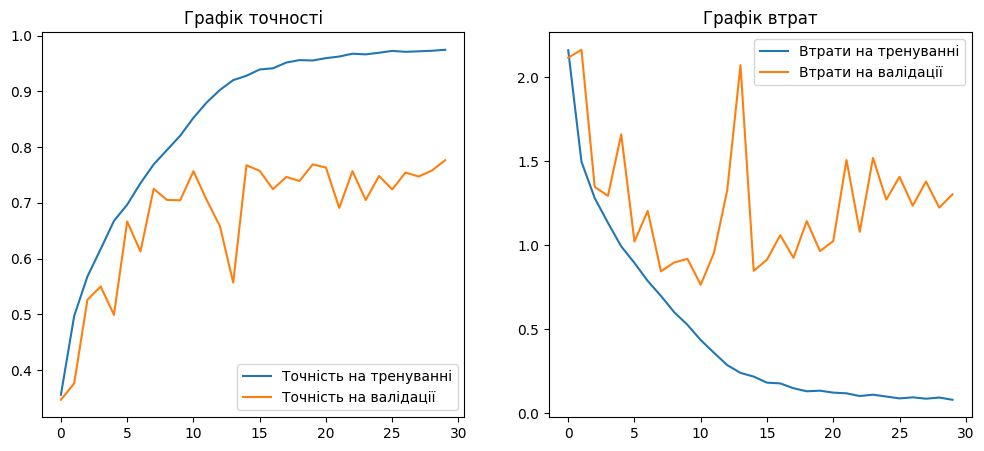

In [5]:
import matplotlib.pyplot as plt 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(len(acc))
plt.figure(figsize=(12, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Точність на тренуванні')
plt.plot(epochs_range, val_acc, label='Точність на валідації') 
plt.legend() 
plt.title('Графік точності') 
plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Втрати на тренуванні') 
plt.plot(epochs_range, val_loss, label='Втрати на валідації') 
plt.legend() 
plt.title('Графік втрат') 
plt.show() 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.9138653e-03 3.8324117e-08 6.2386518e-09 1.9678973e-06 3.3453142e-04
  9.9674773e-01 4.1263000e-08 2.3969312e-08 1.9146416e-06 1.9046213e-08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[7.0494483e-04 9.9868280e-01 8.9071818e-06 5.2102196e-06 5.2947100e-05
  4.2020154e-05 2.3880463e-04 2.5881734e-04 1.8887631e-06 3.6259426e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.8127568e-04 7.2950679e-05 4.2186406e-05 1.1537102e-05 3.7002021e-05
  4.4565049e-06 9.9943966e-01 1.6241081e-04 4.8459980e-05 5.0129874e-08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[7.7348306e-09 3.5356282e-09 1.2289501e-10 3.8259617e-12 1.8734410e-08
  1.7263004e-11 1.0000000e+00 6.4491573e-10 1.1951856e-10 1.0424808e-11]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[2.2470890e-06 6.3234675e-09 2.0299826e-10 2.1727562e-08 9.9999774e-01
  5.8937875e-11 6.2985828e-10 6.0447508e-11 1.1406528e-08 1.7529642e-10]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[5.4975743e-03 1.5808865e-04 1.9720146e-03 

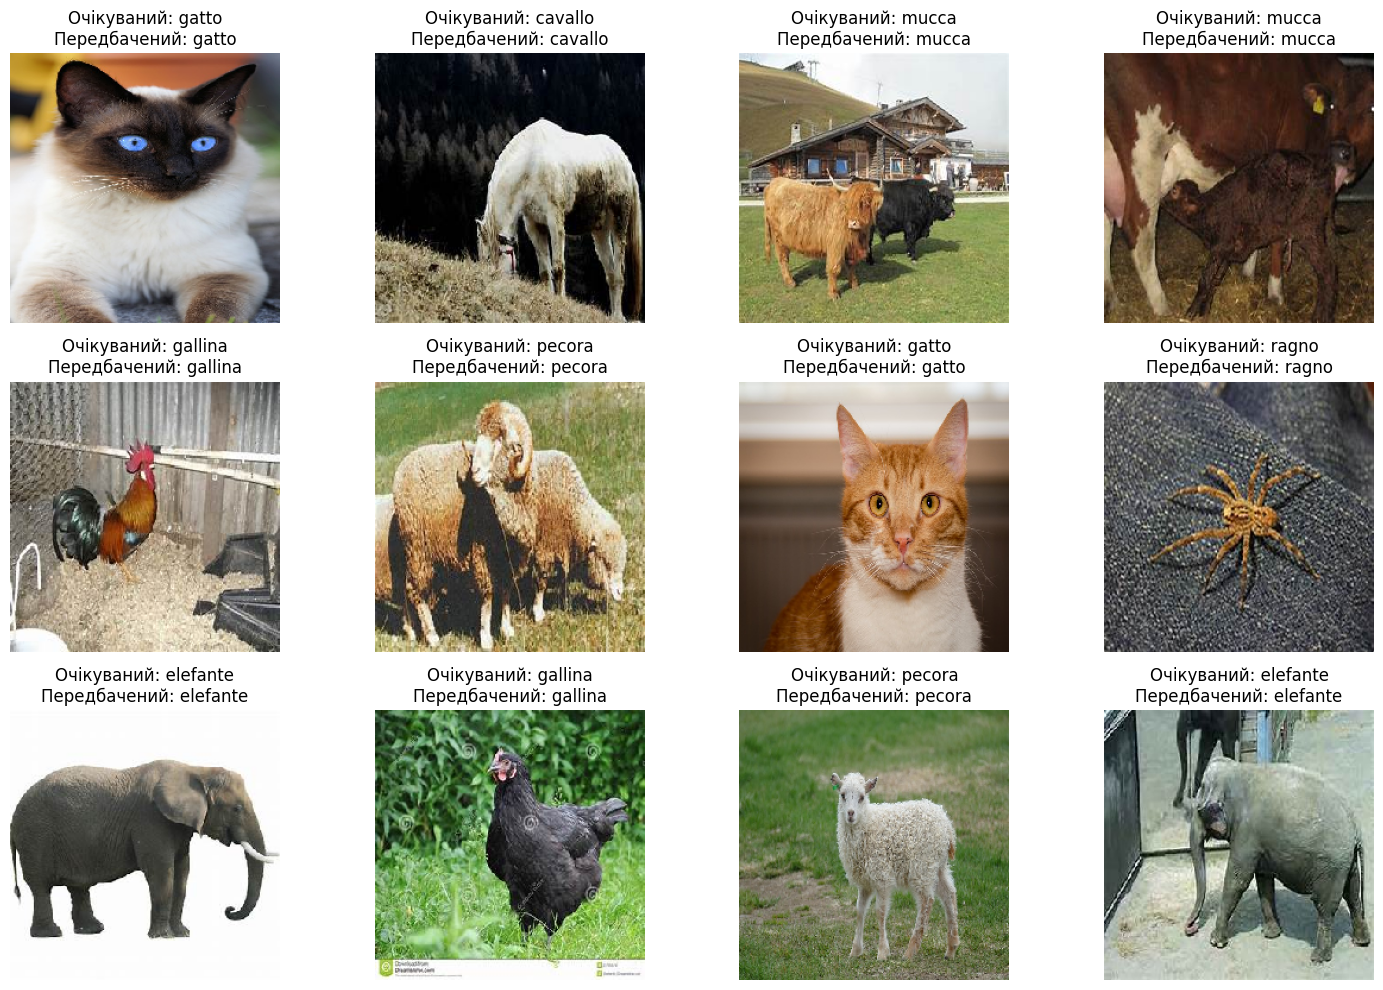

In [6]:
import numpy as np 
import random 
import os 
from tensorflow.keras.preprocessing import image 

num_rows = 3
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(15, 10))

class_names = list(train_generator.class_indices.keys()) 

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    random_class = random.choice(class_names) 
    random_image_path = random.choice(os.listdir(f"{extract_path}/{random_class}" )) 
    img_path = f"{extract_path}/{random_class}/{random_image_path}" 
    img = image.load_img(img_path, target_size=(227, 227)) 
    img_array = image.img_to_array(img) / 255.0 
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array) 
    print(predictions) 
    predicted_class = class_names[np.argmax(predictions)] 
    plt.imshow(img) 
    plt.axis('off') 
    plt.title(f"Очікуваний: {random_class}\nПередбачений: {predicted_class}") 
plt.tight_layout()
plt.show() 

In [7]:
import os 
import random 
import numpy as np 
import pandas as pd 
from tensorflow.keras.preprocessing import image 
num_images = 1024 
batch_size = 128 
output_csv = "classification_results.csv"
all_images = [] 
for class_name in os.listdir(extract_path): 
 class_dir = os.path.join(extract_path, class_name) 
 if os.path.isdir(class_dir): 
     for img_name in os.listdir(class_dir): 
         img_path = os.path.join(class_dir, img_name) 
         all_images.append((img_path, class_name)) 
selected_images = random.sample(all_images, num_images) 
def load_batch(image_data): 
 images = [] 
 paths = [] 
 true_classes = [] 
 for img_path, true_class in image_data: 
     img = image.load_img(img_path, target_size=(227, 227))  
     img_array = image.img_to_array(img) / 255.0 
     images.append(img_array) 
     paths.append(img_path) 
     true_classes.append(true_class) 
 return np.array(images), paths, true_classes 
results = [] 
for i in range(0, num_images, batch_size): 
 batch_data = selected_images[i:i+batch_size] 
 batch_images, batch_paths, batch_true_classes = load_batch(batch_data) 
 predictions = model.predict(batch_images) 
 predicted_classes = np.argmax(predictions, axis=1) 
 for j in range(len(batch_paths)): 
     results.append([batch_paths[j], batch_true_classes[j], class_names[predicted_classes[j]]]) 
df = pd.DataFrame(results, columns=["Шлях до файлу", "Справжній клас", "Розпі знаний клас"]) 
df.to_csv(output_csv, index=False, encoding="utf-8") 
print(f"Результати збережені у {output_csv}") 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Результати збережені у classification_results.csv


164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step
Accuracy = 0.12633792048929662
Precision = 0.1200178594497748
Recall = 0.12633792048929662
F-Score = 0.12241167744130858


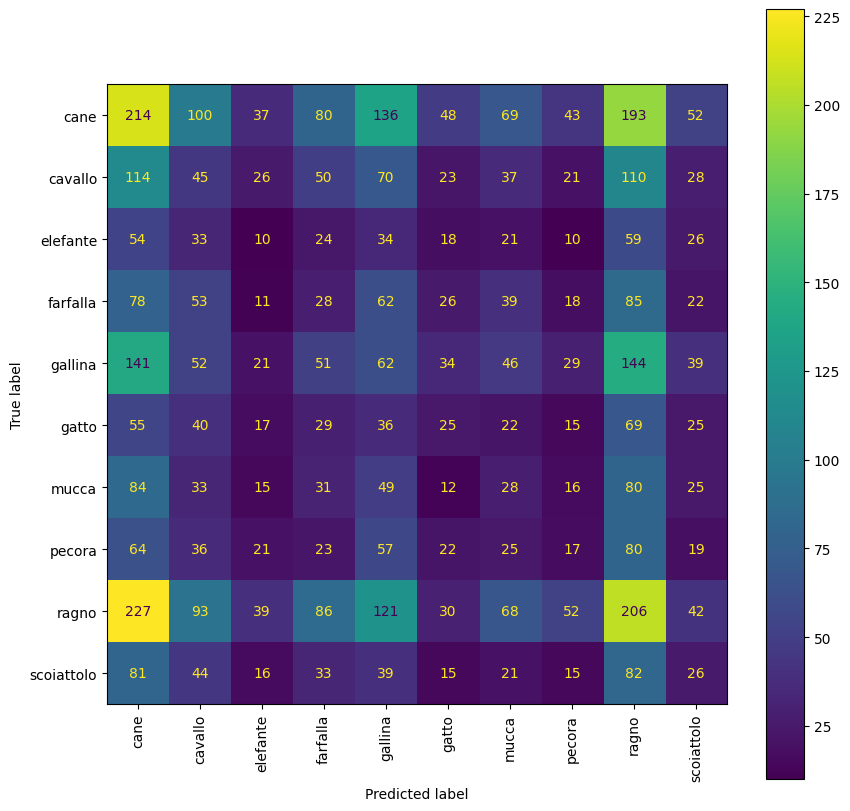

In [8]:
from sklearn import metrics

y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes

cm = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

print(f"Accuracy = {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision = {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall = {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F-Score = {metrics.f1_score(y_true, y_pred, average='weighted')}")

fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

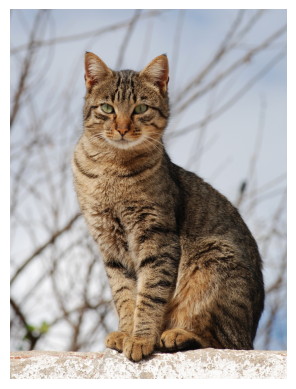

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


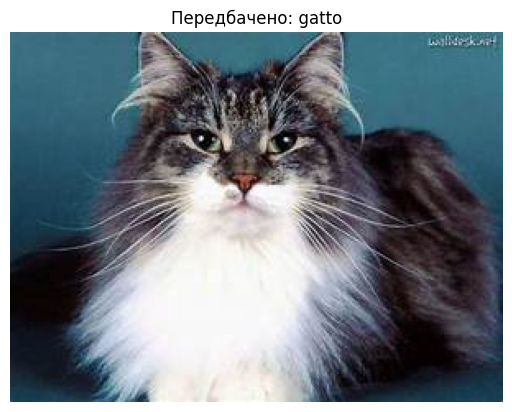

In [9]:
from PIL import Image, ImageOps
import matplotlib.image as mpimg
import os
import random

class_names = list(train_generator.class_indices.keys())

def recognize_animal(image_path, model, class_names_list):
    plt.imshow(mpimg.imread(image_path))
    plt.axis('off')
    plt.show()
    img = Image.open(image_path).convert('RGB')
    img = img.resize((227, 227))
    img_array = np.array(img).astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_animal = class_names_list[predicted_index]
    example_folder_path = os.path.join(extract_path, predicted_animal)
    example_images_list = os.listdir(example_folder_path)
    random_example_name = random.choice(example_images_list)
    example_image_path = os.path.join(example_folder_path, random_example_name)
    plt.imshow(mpimg.imread(example_image_path))
    plt.title(f"Передбачено: {predicted_animal}")
    plt.axis('off')
    plt.show()

recognize_animal('/kaggle/input/animals/Cat_November.jpg', model, class_names)